# Descriptive Statistics

## Dispersion

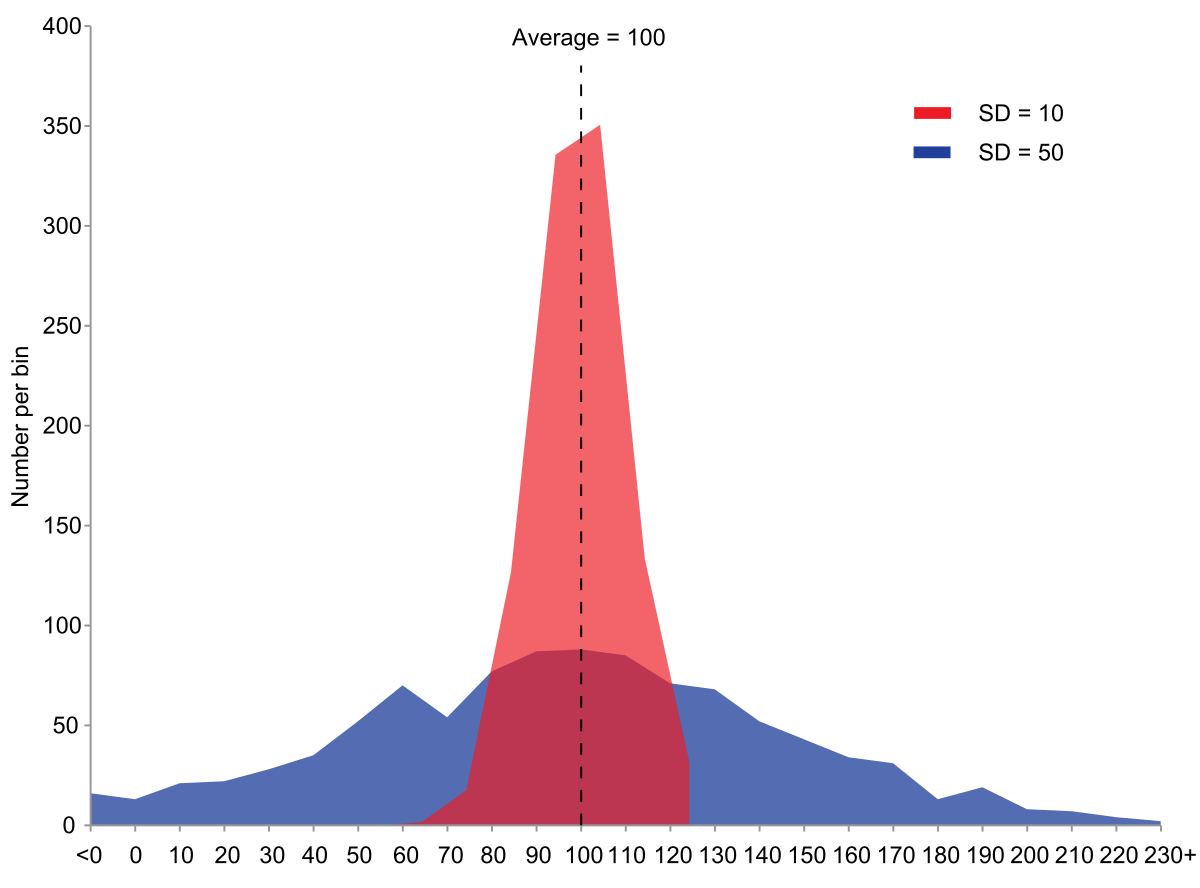

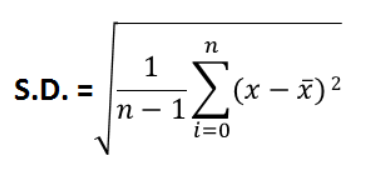

[0,4,8] Umur

Mean = 4
n = 3
Stdev = ((16 + 0 + 16)/3-1)^1/2 = (32/2)^1/2 = 4
j
Variance = 16 tahun kuadrat

Q2 = Median = Percentile 50

## Skewness

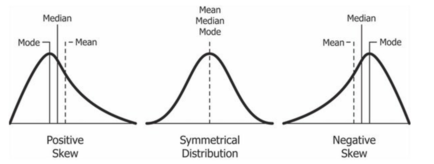

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
math.nan

nan

In [3]:
np.nan

nan

In [4]:
x = [8,1,2.5,4,28]
x_with_nan = [8,1,2.5,math.nan,4,28]
print(x)
print(x_with_nan)

[8, 1, 2.5, 4, 28]
[8, 1, 2.5, nan, 4, 28]


In [5]:
# buat array(y) dan series(z) dari x
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

print(y)
print(y_with_nan)
print(z)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [6]:
z_with_nan.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

# Central Tendency

* Mean
* Weighted mean
* Geometric mean
* HArmonic mean
* Median
* Mode

## Arithmetic Mean

1. x itu list
2. y itu array
3. z itu series

In [51]:
x

[8, 1, 2.5, 4, 28]

In [7]:
sum(x)

43.5

In [8]:
len(x)

5

In [9]:
mean_x = sum(x)/len(x)
mean_x

8.7

In [10]:
mean_stats = statistics.mean(x)
print(mean_stats)

8.7


In [11]:
mean_np = np.mean(x)
print(mean_np)

8.7


In [12]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [13]:
y.mean() #array

8.7

In [14]:
z.mean() #series

8.7

In [15]:
y_with_nan.mean()

nan

In [16]:
np.mean(y_with_nan)

nan

In [17]:
np.nan*3

nan

In [18]:
np.nanmean(y_with_nan) #get mean without considering NaN values

8.7

In [19]:
z_with_nan.mean() #series langsung merata2kan tanpa mempertimbangkan NaN values

8.7

In [52]:
z_with_nan

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

## Weighted Mean

Rata-rata dengan menghitung pembobotan

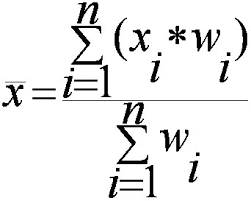

In [20]:
x = [8,1,2.5,4,28] # Metrics
w = [0.1,0.2,0.3,0.25,0.15] #Wightages

# corvert jadi array
y,z,w = np.array(x),pd.Series(x),np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

6.95


In [21]:
#manual calculation
wmean_manual = sum(w[i]*x[i] for i in range(len(x)))/sum(w)
print(wmean_manual)

6.95


In [22]:
sum(w)

1.0

## Harmonic Mean

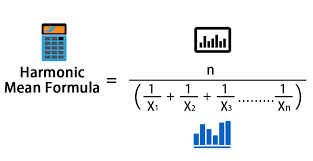

Sering dipakai untuk rata-rata rate(10km/jam, 100kg/hari, 100000 orang/tahun)

Contoh: we travel 10 km at 60 km/h, than another 10 km at 20 km/h, what is our average speed?

In [23]:
speed = [60,20]
hmean_speed = len(speed)/sum(1/item for item in speed)
hmean_speed

30.0

In [24]:
#hmean dengan library 1
hmean_speed_stats = statistics.harmonic_mean(speed)
hmean_speed_stats

30.0

In [25]:
#hmean dengan library 2
hmean_speed_stats2 = scipy.stats.hmean(speed)
hmean_speed_stats2

30.0

In [26]:
x

[8, 1, 2.5, 4, 28]

In [27]:
hmean = len(x) / sum(1/item for item in x)
hmean

2.7613412228796843

In [28]:
arit_mean = np.mean(x)
arit_mean

8.7

In [29]:
x

[8, 1, 2.5, 4, 28]

In [30]:
for item in x:
    print(1/item)

0.125
1.0
0.4
0.25
0.03571428571428571


In [31]:
sum(1/item for item in x)

1.8107142857142857

In [32]:
# hmean dengan library
hmean_stats = statistics

## Geometric Mean

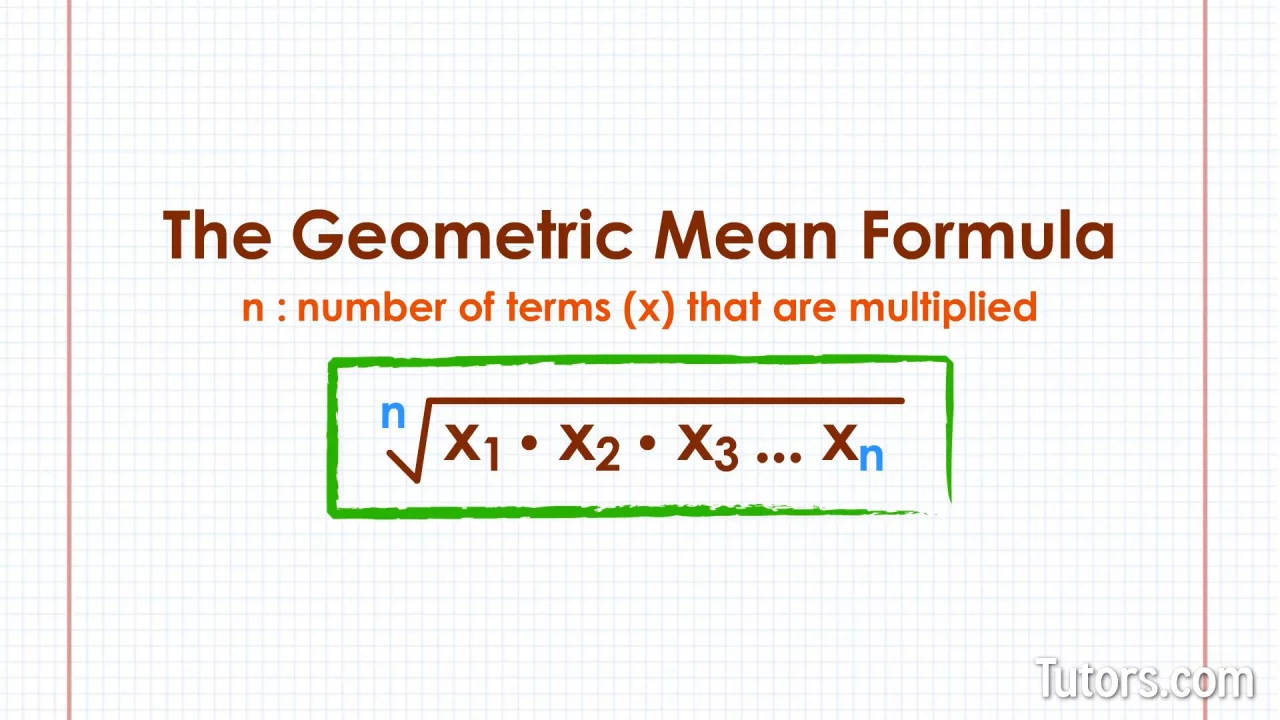

Perusahaan berdiri pada tahun 2017

Tahun 2017 omsetnya 1000

di tahun 2018 naik 30%

di tahun 2019 naik 50%

di tahun 2020 naik 40%

In [33]:
x = 1000
x*=1.3 #1300
x*=1.5 #1950
x*=1.4 #2730
x

2730.0

In [34]:
#Aritmathic mean
(30+50+40)/4

30.0

In [35]:
x = 1000
x*=1.4
x*=1.4
x*=1.4
x

2743.9999999999995

In [36]:
# Geometric mean
gmean = ((30*50*40)**(1/3))
gmean

39.148676411688626

In [37]:
x = 1000
x*=1.3915
x*=1.3915
x*=1.3915
x

2694.322835875

In [38]:
scipy.stats.gmean([30,50,40]) #geometric mean menggunakan library scipy

39.14867641168864

## Median

In [39]:
# Ganjil
a = [1,2,4,8,9]
n = len(a)
median = a[2]
median

4

In [40]:
# Genap
a = [1,2,4,8]
n = len(a)
(n+1)/2
median = (2+4)/2
median

3.0

In [41]:
# Menggunakan numpy
x = [8,1,2.5,4,28]
c = [1,2,3,4]
np.median(x)
np.median(c)

2.5

In [53]:
# Pembuktian manual
def median_function(x):
    n = len(x)
    if n%2 == 1: # ganjil
        median_ = sorted(x)[round(0.5*(n-1))] #ambil median
    else: # genap
        x_ord, index = sorted(x), round(0.5*n)
        median_=0.5*(x_ord[index-1]+x_ord[index])
    return median_

In [54]:
median_function(x)

4

In [55]:
median_function(c)

2.5

In [ ]:
sorted(x)

[1, 2.5, 4, 8, 28]

In [ ]:
n = len(x)
round(0.5*(n-1))

2

# Mode/Modus

Nilai yang paling sering muncul/frekuensi paling tinggi

In [47]:
u = [2,3,2,8,12]

mode_ = max((u.count(i),i) for i in set(u))[1]

In [48]:
statistics.mode(u)

2

In [56]:
scipy.stats.mode(u)[0][0]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6328\4097402543.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(u)[0][0]


2

In [57]:
mode_lib = scipy.stats.mode(u)[0][0]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6328\557296625.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_lib = scipy.stats.mode(u)[0][0]


In [66]:
print(mode_lib)
print(mode_lib.mode)
print(mode_lib.count)

2


AttributeError: 'numpy.int32' object has no attribute 'mode'

In [59]:
u

[2, 3, 2, 8, 12]

In [60]:
u_series = pd.Series(u)
u_series.mode()

0    2
dtype: int64

In [61]:
u_array = np.array(u)
statistics.mode(u_array)

2

In [62]:
v = pd.Series([1,2,3,3,3,np.nan,np.nan,np.nan,np.nan,np.nan])
v.mode()

0    3.0
dtype: float64

In [63]:
statistics.mode(v)

3.0

In [64]:
h = [1,2,3,3,3,np.nan,np.nan,np.nan,np.nan,np.nan]
statistics.mode(h)

nan

Series akan mengabaikan NaN dan List akan mempertimbangkan NaN

# Measures of Variability

## Variance

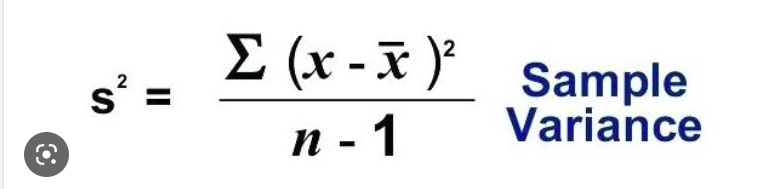

In [67]:
x

[8, 1, 2.5, 4, 28]

In [68]:
n = len(x)
mean_var = np.mean(x)
var_ = sum((item-mean_var)**2 for item in x ) / (n-1)
var_

123.19999999999999

In [69]:
# Variance w/ statistics library
var_stat = statistics.variance(x)
var_stat

123.2

In [70]:
#variance w/ numpy
var_np = np.var(x,ddof=1)
var_np

123.19999999999999

In [71]:
# Variance using series functin
z = pd.Series(x)
z.var()

123.19999999999999

# Standard Deviasi

Quiz hitung variance dan standar deviasi

In [72]:
x = [1,2,3,6,7,8,30,40,50]
std_dev = statistics.stdev(x)
print("Standar deviasi dari x adalah:", std_dev)

variance = statistics.variance(x)
print("Variansi dari x adalah:", variance)

Standar deviasi dari x adalah: 18.58090417606205
Variansi dari x adalah: 345.25000000000006


In [73]:
x = [1,2,3,6,7,8,30,40,50]
n = len(x)
mean = sum(x)/n
var_ = sum((item - mean)**2 for item in x)/(n-1)
Sd_ = var_**(1/2) #

print(var_)
print(Sd_)

345.25000000000006
18.58090417606205


In [74]:
x = [8, 1, 2.5, 4, 28]

In [75]:
var_np

123.19999999999999

In [76]:
stdev = var_np**(1/2)

In [77]:
stdev

11.099549540409285

In [78]:
stdev = np.sqrt(var_np)
stdev

11.099549540409285

In [79]:
# stdev with statistics library
stdev = statistics.stdev(x)
stdev

11.099549540409287

In [80]:
stdev = np.std(x,ddof=1)
stdev

11.099549540409285

## Skewness

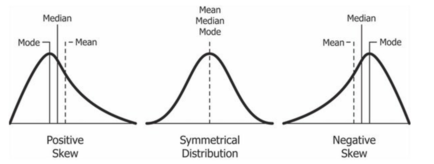

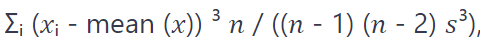

In [81]:
x

[8, 1, 2.5, 4, 28]

In [82]:
n = len(x)
mean = np.mean(x)
stdev = statistics.stdev(x)
skew_ = (sum((item - mean)**3 for item in x))*n / ((n-1)*(n-2)*(stdev**3))
skew_

1.947043227390592

In [84]:
scipy.stats.skew(x,bias=False)

1.9470432273905927

In [85]:
z = pd.Series(x)
z.skew()

1.9470432273905924

In [86]:
scipy.stats.skew(x_with_nan)

nan

In [87]:
z_with_nan = pd.Series(x_with_nan)
z_with_nan.skew()

1.9470432273905924

In [ ]:
scipy.stats.skew(z_with_nan)

nan

## Percentiles

In [89]:
x = [-5,-1.1,0.1,2,8,12.8,21,25.8,41]
np.percentile(x,5) #Percentile 5

-3.44

In [90]:
np.percentile(x,0)

-5.0

In [91]:
np.percentile(x,100)

41.0

In [92]:
np.percentile(x,90)

28.840000000000003

In [93]:
statistics.quantiles(x,n=2)

[8.0]

In [95]:
statistics.quantiles(x,n=4)

[-0.5, 8.0, 23.4]

In [96]:
statistics.quantiles(x,n=4,method='inclusive')

[0.1, 8.0, 21.0]

In [97]:
x

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [98]:
np.quantile(x,0)

-5.0

In [99]:
np.quantile(x,1)

41.0

In [100]:
np.quantile(x,0.5)

8.0

In [101]:
x

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [102]:
x_with_nan = [-5, -1.1,np.nan, 0.1, 2, 8, 12.8, 21, 25.8, 41]
x_with_nan

[-5, -1.1, nan, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [103]:
np.quantile(x_with_nan,0)

nan

In [105]:
np.nanquantile(x_with_nan,0.5)

8.0

In [106]:
x

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [107]:
np.quantile(x,[0.25,0.5,0.75])

array([ 0.1,  8. , 21. ])

In [108]:
statistics.quantiles(x,n=4,method='inclusive')

[0.1, 8.0, 21.0]

In [109]:
np.percentile(x,[25,50,75])

array([ 0.1,  8. , 21. ])

## Range (nilai max-nilai min)

In [110]:
x # Ranges  = 41 - (-5) = 46

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [111]:
# np.ptp untuk menghitung range
np.ptp(x)

46.0

In [112]:
np.amax(x)

41.0

In [113]:
np.amin(x)

-5.0

In [114]:
np.amax(x) - np.amin(x)

46.0

## Interquartile Range (Q3-Q1) (biasanya digunakan untuk mendeteksi outlier)

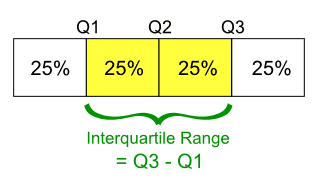

In [115]:
x

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [116]:
quartiles = np.quantile(x,[0.25,0.75])
IQR = quartiles[1] - quartiles[0]
IQR

20.9

## Summary of Desc. Stats

In [117]:
x

[-5, -1.1, 0.1, 2, 8, 12.8, 21, 25.8, 41]

In [118]:
result = scipy.stats.describe(x,ddof=1,bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [120]:
(result.variance)**(1/2)

15.12454774346805

In [121]:
result.minmax[1]-result.minmax[0]

46.0

In [122]:
result.skewness

0.9249043136685094

In [123]:
z = pd.Series(x)
z

0    -5.0
1    -1.1
2     0.1
3     2.0
4     8.0
5    12.8
6    21.0
7    25.8
8    41.0
dtype: float64

In [124]:
z.describe()

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

## Correlation

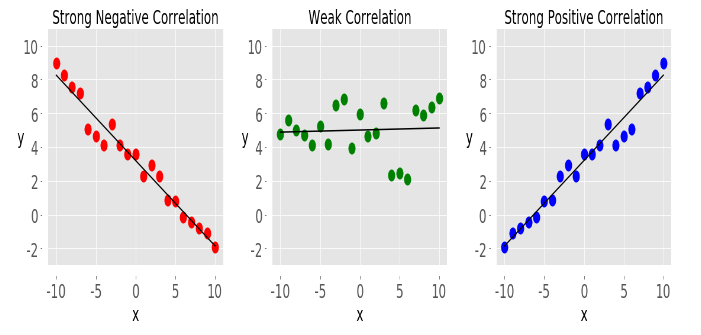

In [125]:
x = list(range(-10,11))
y = [0 , 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_ar, y_ar = np.array(x),np.array(y)
x_s,y_s = pd.Series(x),pd.Series(y)

In [126]:
len(x)==len(y)

True

## Covarience

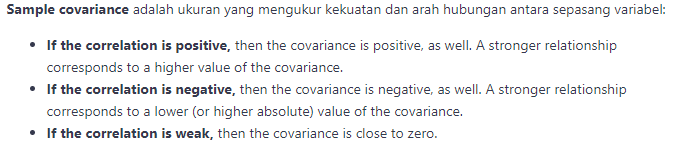

In [127]:
n = len(x)
mean_x = np.mean(x)
mean_y = np.mean(y)

cov_xy = (sum((x[item]-mean_x)*(y[item]-mean_y) for item in range(n)))/(n-1)
cov_xy

19.95

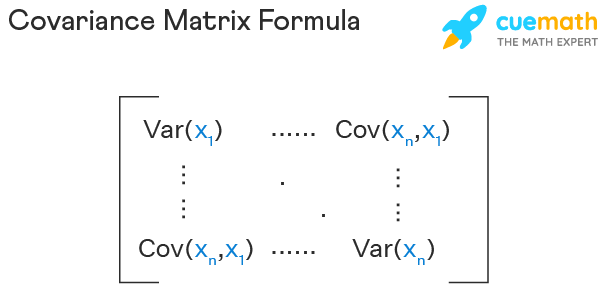

In [128]:
cov_matrix = np.cov(x,y)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [129]:
np.var(x,ddof=1)

38.5

In [131]:
np.var(y,ddof=1)

13.914285714285711

In [132]:
cov_xy = cov_matrix[0,1]
cov_xy

19.95

In [133]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

## Correlation Coefficient

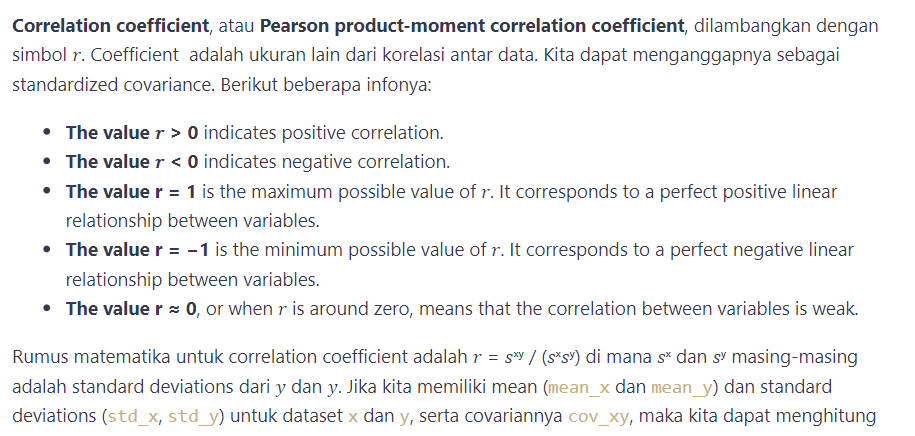

r = 1 / r= -1 atau mendekati merupakan tanda kedua variabel mengalami multicollinearity

In [134]:
var_x = np.var(x,ddof=1)
var_y = np.var(y,ddof=1)
cov_xy
std_x = var_x**(1/2)
std_y = var_y**(1/2)
r = cov_xy / (std_x*std_y)
r

0.861950005631606

Korelasi positif sangat kuat karena sangat mendekati 1

In [139]:
xy_corr = scipy.stats.pearsonr(x,y).statistic
xy_corr

0.8619500056316058

In [135]:
r , p = scipy.stats.pearsonr(x,y)
r

0.8619500056316058

In [136]:
p

5.122760847201207e-07

In [140]:
corr_matrix = np.corrcoef(x,y)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [142]:
scipy.stats.linregress(x,y).rvalue

0.861950005631606

In [143]:
a = np.array([[1,1,1],
             [2,3,1],
             [4,9,2],
             [8,27,4],
             [16,1,1]])

In [144]:
np.mean(a)

5.4

In [145]:
np.median(a)

2.0

In [146]:
np.mean(a,axis=0)

array([6.2, 8.2, 1.8])

In [155]:
np.var(a,ddof=0)

49.84000000000001

In [156]:
np.var(a,ddof=1)

53.40000000000001

In [157]:
# Pada DataFrame

In [147]:
row_names = ['first','second','third','fourth','fifth']
col_names=['A','B','C']
df = pd.DataFrame(a,index=row_names,columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [148]:
np.mean(df.A)

6.2

In [149]:
df['A'].mean()

6.2

In [151]:
np.var(df,ddof=1)

A     37.2
B    121.2
C      1.7
dtype: float64

In [152]:
df.var(ddof=0)

A    29.76
B    96.96
C     1.36
dtype: float64

In [153]:
df.mean(axis=0)

A    6.2
B    8.2
C    1.8
dtype: float64

In [154]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64